# Learning Plattform: Probability Distributions and Naive Bayes Classifier

OMG statistics... the associations vary from boring to terrifying - so why step into this notebook at all??<br> Well, because statistics ARE the basis of Machine Learning and, frankly, any type of Data Analysis. If you blindly apply Machine Learning methods without a fundamental understanding of statistics, you will not get very far and will waste a lot of your time in the long run. And there is no way it can be as bad as you think.

Fortunately, even simple statistical methods can get you a long way. You can gain a lot of insight and make powerful estimations and predictions even using simple models such as linear regression or - as we focus on in this notebook - the [Naive Bayes Classifier](https://towardsdatascience.com/naive-bayes-classifier-81d512f50a7c).

## Takeaways from this Notebook

1. The Normal Distribution
2. Conditional Probabilities
3. Statistical Independence
4. Bayes Theorem
5. Naive Bayes Classifier: Theory & Application

## 1. The Normal Distribution
A [probability distribution](http://statisticsbyjim.com/basics/probability-distributions/) describes the probability of obtaining certain values of a [random variable](https://en.wikipedia.org/wiki/Random_variable). In other words, the values of the variable vary according to the underlying probability distribution.<br>
We always normalise such that the sum of all probabilities is 1, and require that each probability be in the range between 0 and 1.

<img src="files/assets/img/10_DM_Serie4_Vorderseite.jpg" align="left" style="width: 400px">

Yes, the old [Gaussian](https://en.wikipedia.org/wiki/Carl_Friedrich_Gauss) distribution... but why is it so important?

Statistical distributions, and especially the **Gaussian or Normal Distribution**, can very often serve as **basic models** of our data. Very often, natural or technical processes deliver data that are approximately [normally distributed](https://en.wikipedia.org/wiki/Normal_distribution). Examples are:
- height of people
- blood pressure of people
- size of components produced in assembly lines
- errors in measurements

and many more.

So let us look at some normal distributions in Python. First, we import the necessary packages:

In [1]:
import matplotlib.pyplot as plt # for plotting

import pandas as pd # for data handling
import numpy as np  # for calculations

import scipy
import scipy.stats as st # for statistical calculations

from scipy.stats import norm # normal distribution

### Influence of Distribution Parameters

Now we generate normal distributions for different: 
- [**expected values**](https://en.wikipedia.org/wiki/Expected_value) $\mu$ ("mu") which, in case of the normal distribution, mark the maximum and the center of the curves,
- [**standard deviations**](https://en.wikipedia.org/wiki/Standard_deviation) $\sigma$ ("sigma") which will influence the spread of the curves.

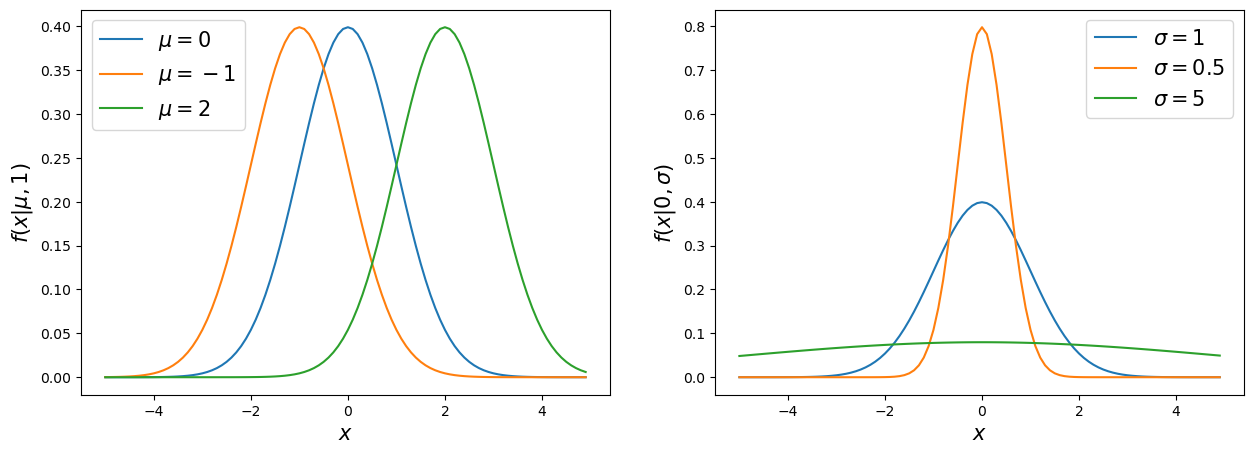

In [2]:
# expected values
mu1 = 0
mu2 = -1
mu3 = 2

# standard deviations (=sigma)
std1 = 1
std2 = 0.5
std3 = 5

# x axis
x = np.arange(-5,5,0.1)

# generate distributions for varying expected value mu
y1 = norm.pdf(x,mu1,std1)
y2 = norm.pdf(x,mu2,std1)
y3 = norm.pdf(x,mu3,std1)

# plot 
plt.rcParams["figure.figsize"] = (15,5)
plt.subplot(1,2,1)
plt.plot(x,y1,label=r'$\mu = 0$')
plt.plot(x,y2,label=r'$\mu = -1$')
plt.plot(x,y3,label=r'$\mu = 2$')
plt.legend(fontsize=15)
plt.xlabel(r'$x$',fontsize=15)
plt.ylabel(r'$f(x|\mu,1)$',fontsize=15)

# generate distributions for varying variance sigma
y1 = norm.pdf(x,mu1,std1)
y2 = norm.pdf(x,mu1,std2)
y3 = norm.pdf(x,mu1,std3)

# plot
plt.subplot(1,2,2)
plt.plot(x,y1,label=r'$\sigma = 1$')
plt.plot(x,y2,label=r'$\sigma = 0.5$')
plt.plot(x,y3,label=r'$\sigma = 5$')
plt.legend(fontsize=15)
plt.xlabel(r'$x$',fontsize=15)
plt.ylabel(r'$f(x|0,\sigma)$',fontsize=15)
plt.show()

We can see that 
- increasing $\mu$ shifts the curve to the right
- increasing $\sigma$ flattens the curve.

So, now what do we do with these guys? As mentioned, they provide nice models for many different kinds of data. Below, we show how to **fit** such a model.

### Fitting Gaussian Distributions to Data

We will now import the [wine data set](https://archive.ics.uci.edu/ml/datasets/wine) that you will use again in your homework assignment. It describes three different types of wine with many parameters like alcohol or magnesium content, flavanoids, phenols, and so on. _[Pandas](https://pandas.pydata.org/)_ provides great tools for data handling. We can easily import data and get a quick overview using the *describe* command as below:

In [3]:
# load the data file
wine = pd.read_csv('input/wine_data.csv', delimiter=";")

# have a first look at the data (head allows to show only the first 5 rows)
wine.head()

,class,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od_280_315,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
# gain some insights via statistics
wine.describe()

,class,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od_280_315,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


We can now also look at a only a single column (e.g. the class of wine). Using hist() we display a histogram of this column.

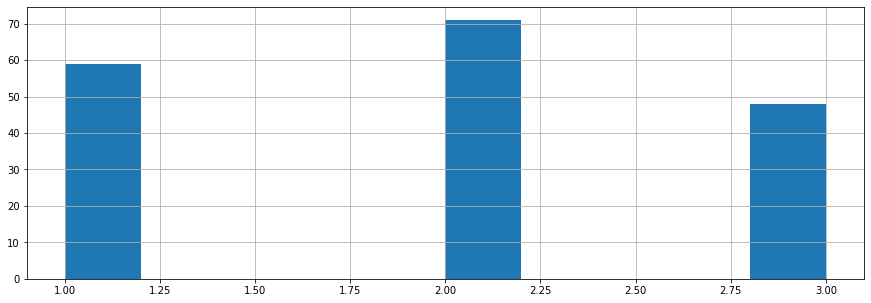

In [5]:
wine["class"].hist()

As we can see, there are three types of wine in the data set, given by the *class* label. We will split the data set and plot the [probability distribution](https://stattrek.com/probability-distributions/probability-distribution.aspx) of alcohol content of one of these wine types (e.g. class 2) using the _[hist](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html)_ plot from _[matplotlib](https://matplotlib.org/index.html)_. Note that 15 is the number of [bins](https://en.wikipedia.org/wiki/Histogram#Number_of_bins_and_width), and the parameter _"density"_ normalizes the histogram to sum up to a total of 1, as we would expect of a probability distribution.

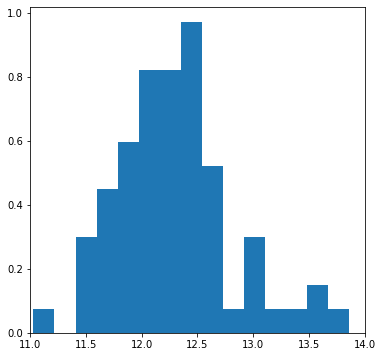

In [6]:
# split the data set by class
type2 = wine.loc[wine['class'] == 2]

# plot
plt.rcParams["figure.figsize"] = (6,6)
plt.xlim([11,14])
a = plt.hist(type2['alcohol'], 15, density = True)
plt.show()

Because this already looks approximately normally distributed, we can fit the parameters necessary for the Gaussian curve: expected mean and variance. To make the optimal guess for the values of mean and variance (standard deviation squared, $\sigma^2$) of the true distribution, we calculate the mean and variance of our _N_ samples:

mean(samples): $\mu = \frac{1}{N}\sum_{i=1}^N x_i$

variance(samples): $ \sigma^2 = \frac{1}{N}\sum_{i=1}^N (x_i - \mu)^2$

Then we plot the resulting Gaussian curve over the distribution of the input data:

Estimated mean:
 12.279

Estimated variance: 
  0.285


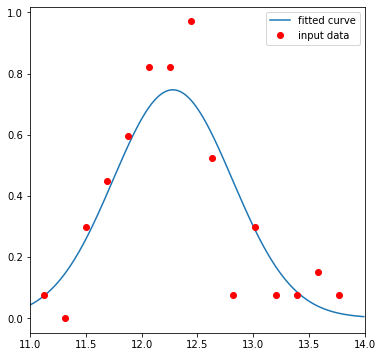

In [14]:
# mean value
mean = np.mean(type2['alcohol'])
print('Estimated mean:\n', '{:6.3f}'.format(mean))

# variance
var = np.var(type2['alcohol'])
# take square root for standard deviation 
# Note: we could get this directly with np.std()
std = np.sqrt(var)
print('\nEstimated variance: \n', '{:6.3f}'.format(var))

# Gauss plot
x1 = np.arange(10,14,0.01)
y1 = norm.pdf(x1,mean,std)
plt.plot(x1,y1, label = 'fitted curve')

# plot the distribution of the alcohol data
x  = a[1] # bin edges
x2 = x[1:] - (x[1]-x[0])/2 # shift to the middle of the bins
y2 = a[0]
plt.plot(x2,y2,'ro',label = 'input data')
plt.xlim([11,14])
plt.legend()
plt.show()

The fit is not perfect but gives a good first estimation. Another everyday tool based on normal distributions are the...

### Sigma Rules

In the context of Gaussian distributions we can quantify a measurement's deviation from the mean via the so-called [**Sigma Rules**](https://en.wikipedia.org/wiki/68%E2%80%9395%E2%80%9399.7_rule):

<img src="assets/img/files/Sigma.PNG" align="left" style="width: 700px">


<img src="files/assets/img/Plug.PNG" align="left" style="width: 250px; padding-right: 15px;"> 

As an application, assume that you produce ignition plugs with an expected length of μ = 12 cm. Your customers are satisfied if 99% of the plugs lie in the interval $I = (11.99\, cm, 12.01\, cm)$.

How large a standard deviation could you allow in your production process, assuming that the lengths are Gaussian distributed, and still satisfy the customer?

From the table above we know that 99% of the population will lie in the 2.58 $\sigma$ reach of the mean. Hence:

$$\sigma = \frac{0.01\, cm}{2.58} = 0.0038\, cm$$ 




So that was easy. But the information gain was not too stunning. A more impressive application will follow; the so-called **Naive Bayes Classifier**. 

To learn about its theory, let us first review another concept of basic statistics:

## 2. Conditional Probabilities

<img src="files/assets/img/lp_intro_statistics_tea-drinker.png" align="left" style="width: 850px">

We intuitively interpret such statistics in the right way. We understand that **given** somebody likes to drink coffee, the probability of her liking to drink tea is 55%. Our prior knowledge _"person = likes coffee"_  influences the statistics, in other words the probability of someone liking tea is **conditioned** on this knowledge. To introduce this concept formally, we define some notation:

<img src="files/assets/img/lp_intro_statistics_coffee_tea_yes_no.png" align="left" style="width: 420px">

The [**conditional probability**](https://www.mathsisfun.com/data/probability-events-conditional.html) P(T|$\bar{C}$) (shown in orange in the diagram below) answers the question:

_"How probable is it that a person who does not like coffee (condition $\bar{C}$) does like tea (event T)?"_

We use this concept quite often in our private and work life, and it is important to pay attention when working with conditional probabilities. One of the known pitfalls is to mix it with another concept, that of **joint probability**

P(T∩$\bar{C}$) = P($\bar{C}$)∙P(T|$\bar{C}$),

which answers the question:

_"How probable is it that a German citizen does not like coffee **and** does like tea?"_

<img src="files/assets/img/lp_intro_statistics_coffee_tea_tree_conditional.png" align="left" style="width: 600px">

To better understand the difference, let us look at the numbers:
- P(T|$\bar{C}$) = 85%
- assume that P($\bar{C}$) = P($C$) = 50%
so we can calculate that

P(T∩$\bar{C}$) = P($\bar{C}$)∙P(T|$\bar{C}$) = 42.5%

This latter number is the probability to pick out of the complete German population a person who does **not** like coffee but does like tea. The conditional probability, in contrast, picks from the group of only those German people who do not like coffee!

## 3. Statistical Independence

We could see how strongly prior knowledge and conditions influence probabilities. Sometimes it is important to prove or to exclude that such influences are significant in the system we are investigating. If we know that our outcome depends on a certain influence factor, we have to treat it differently to factors for which we can safely assume that there is no (or very little) influence.

But how can we do this? For this there is another statistical concept, [statistical (in-)dependence](https://en.wikipedia.org/wiki/Independence_(probability_theory)).

If the chance of an event C does **not** depend on another event D, these two are called **statistically independent**. Mathematically, this can be expressed by

P(C|D)=P(C) or equivalently P(D∩C)=P(D)∙P(C).

In our example this would be the case if the chance of a given person liking tea were independent of whether or not she liked coffee. Since this is not the case (55% vs 85%), we can conclude that, in our example, liking coffee and liking tea are not statistically independent events.

For more complicated and hence harder to analyze data there are software packages to help us. In Python, we can use [chi2_contingency](https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.chi2_contingency.html) from [stats package](https://docs.scipy.org/doc/scipy-0.15.1/reference/stats.html). Before we explain the functionality of `chi2_contingency` in more detail, let us look at some examples. The observations have to be given to the function in the form of a [contingency table](https://en.wikipedia.org/wiki/Contingency_table) containing the [frequency distributions](https://en.wikipedia.org/wiki/Frequency_distribution) of the variables:


In [8]:
from scipy.stats import chi2_contingency

# stochastically dependent example (= linearly independent frequencies)
obs = np.array([
    [1140, 260], 
    [60  , 40 ]
])
print('p-value dependent example: ',chi2_contingency(obs)[1])

# stochastically independent example (= linearly dependent frequencies)
obs = np.array([
    [1200, 100, 200], 
    [600,  50 , 100]
])
print('p-value independent example: ',chi2_contingency(obs)[1])

# stochastically 'almost' independent example  (= linearly 'almost' dependent frequencies)
obs = np.array([
    [1200, 100, 200], 
    [600,  52,  98 ]
])
print('p-value almost independent example: ',chi2_contingency(obs)[1])

p-value dependent example:  4.5090907978399056e-07
p-value independent example:  1.0
p-value almost independent example:  0.9610406143963233


The `chi2_contingency` test returns the so-called [p-value](https://en.wikipedia.org/wiki/P-value) as a result. The smaller the p-value the more confident we can be that the analysed frequency sets are not generated from the same distribution, i.e. there is some statistical interdependence. 

BUT BE CAREFUL!!! Although we can be more confident for larger p-values, the p-value does not represent a confidence level for statistical independence. A p-value of 0.8 does **not** indicate an 80% probability of statistical independence. The p-value does not allow us to infer the dependence of the generating distributions from the observed frequencies. In fact, the question it answers is almost the reverse. We take the null hypothesis $H_0 = $_'The two sets of frequencies are generated from the same distribution'_ (see [hypothesis tests](https://en.wikipedia.org/wiki/Statistical_hypothesis_testing)). We can then evaluate how likely the observed frequency distributions are under this assumption. More precisely, we ask ourself the question _'How often do two frequency sets which are generated from the same distribution deviate at least as much as we observe in our specific case?'_. The p-value is the probability for at least such a deviation given our null hypothesis of statistical independence.

The first example above returns a very small p-value, which indicates that such large deviations in the observed frequencies are very unlikely given our null hypothesis of statistical independence.

In our second example the two sets contain the same frequencies, i.e. are they not different at all (remember that only the frequencies and not the actual values are relevent). The chance for at least 0 deviation to occur has to be 100%. We can see that the p-value is 1=100% and hence correctly reflects this fact.

In the third example we find a p-value of 96.1%, i.e. our test claims that the probability for such a deviation (or a larger one) to occur is quite large. This seems appropriate since there is only a minor difference in the observed frequencies.

However, it is important to notice is that this test does not allow us to answer the question _'Given the observed difference in the frequency distributions how likely is it that the two sets are statistically independent?'_. To get an intuitive understanding why this is true let us look at the second example again. Although the observed frequency sets are identical this does not mean that the two sets must have been sampled from the same distribution. Since the generative process is stochastic, different distributions could have by chance produced identical frequencies. Note that we have asserted the statement 'Assuming $H_0$ is true, the probability for observing identical frequencies in the two sets is large.' and hence the reasoning would be circular if we treated this as evidence for $H_0$ being true (since we started with this assumption). Hence a test can only be used to **reject** the Null Hypothesis (if the p-value is sufficiently small), but never to confirm it. We then have derived the statement _'Either $H_0$ is true and we have witnessed a very rare event – or it is false.'_ (but note that we cannot judge the [likelihood](https://en.wikipedia.org/wiki/Likelihood_function) of the two cases!). 

To infer the probability of statistical independence from the p-value of the `chi2_contingency` test we need to use Bayes' Theorem (see below) **and** put in some prior knowledge (or belief) of how likely we assume (prior to observing any data) statistical independence and statistical interdependence respectively to be.

At this point there might be some confusion about the term "independent" since in the second example the two sets of frequencies (or probabilities) are linearly dependent, yet the example is classified as independent. The reason for this is that those sets depend on the same condition. The first set represents the frequencies in case a condition is satisfied (e.g. person likes coffee). The second set represents the frequencies in case the condition is not satisfied (e.g. person does not like coffee). In case the two sets are **linearly dependent**, the frequencies (and hence the probabilities) are **statistically independent** of the condition (strictly speaking it only increases the probability that those frequencies have been drawn from a probability distribution in which they are statistically independent of the condition, as discussed above). 

With the concepts developed so far, we can now understand the simple but powerful [Bayes Theorem](https://towardsdatascience.com/bayes-theorem-the-holy-grail-of-data-science-55d93315defb):

## 4. Bayes Theorem

We understand from the example above that given a person likes coffee, the probability for him to like tea is:

$$P(T|C) = 0.55$$

Now we ask the reverse question:

_"Given a person likes tea, what is the probability $P(C|T)$ for him to like coffee?"_

Thanks to mathematician & priest [Thomas Bayes](https://en.wikipedia.org/wiki/Thomas_Bayes) (1701 - 1761), we can calculate $P(C|T)$ from this formula:

$$P(C|T) = \frac{P(T|C)\cdot P(C)}{P(T)}.$$

The proof is an easy exercise, you can try it on your own and check it [here](https://de.wikipedia.org/wiki/Satz_von_Bayes#Beweis). 

Given $P(T|C) = 0.55$ and $P(C) = 0.5$, it is an easy exercise calculate that

$$P(C|T) \approx 0.39$$

To get the "missing" value $P(T)$ you can use the law of total probability: $P(T) = P(T∩C) + P(T∩\bar{C})= P(T|C)\cdot P(C) + P(T|\bar{C})\cdot P(\bar{C})$

In our case, the result is not life-changing, but Bayes Theorem finds many interesting applications in "real life", such as engineering, economics, and medicine. A prominent example is the one of drug testing: Imagine we know that a certain drug test delivers 99% [true positive](https://en.wikipedia.org/wiki/False_positives_and_false_negatives) results for drug users and 99% true negative results for non-drug users. Suppose that 0.5% of people are users of the drug. Now the interesting question is

_"What is the probability that a randomly selected individual with a positive test is a drug user?"_

Try to calculate it on your own before reading this [article](https://en.wikipedia.org/wiki/Bayes%27_theorem#Drug_testing). Fun fact: You can do a lot to produce a false positive - some ideas [here](https://www.livescience.com/56921-weird-ways-you-can-test-positive-for-drugs.html) ^^

In Machine Learning, Bayes Theorem shows how really basic statistics already allow us to make predictions. A nice example is the Naive Bayes Classifier, which incorporates prior knowledge into a model that can then be applied to unclassified data. Let us see what the ideas behind it are and how it works.

## 5. Naive Bayes Classifier Theory

First of all, what is a [**classifier**](https://towardsdatascience.com/machine-learning-classifiers-a5cc4e1b0623)?

Given certain input variables, it sorts data into classes, like customers buying laptops or desktop computers in the example below:

<img src="files/assets/img/lp_intro_statistics_laptop_desktop_classifier.png" align="left" style="width: 800px">

### Naivety Assumption

Why is it called **naïve**?

We “naïvely” assume the variables $x_j$  to be stochastically independent for all classes $C_i$:

$$P((x_1|C_i)\cap(x_2|C_i)\cap\dots\cap(x_n|C_i)) = P(x_1|C_i)\cdot P(x_2|C_i)\cdot\dots P(x_n|C_i) = \prod_{j=1}^nP(x_j|C_i).$$

For some variable combinations, like age and eye color, this makes sense. For others, like age and income, not so much (as indicated by this [article](https://de.statista.com/infografik/8676/in-welchem-alter-verdient-man-am-besten)) - the **naïvety assumption** excludes this possibility.

<img src="files/assets/img/lp_intro_statistics_independence_assumption.png" align="left" style="width: 600px">

### Bayes' Formula

Our **target** is to predict the computer (desktop or laptop) class $C_i$ given values for the input variables $x_j$ as shown below. As a mathematical statement, we want to find

$$P(C_i|x) = P(C_i|x_1\cap x_2\cap\dots\cap x_n).$$

Applying Bayes' Theorem and the naïvety assumption, we find

$$P(C_i|x) = \frac {P(C_i)}{P(x)}\cdot \prod_{j=1}^nP(x_j|C_i).$$

The proof can be found [here](https://en.wikipedia.org/wiki/Naive_Bayes_classifier#Probabilistic_model).

As we are only interested in the most likely class, $C^*$, given the input variables, $x_j$, $P(x)$ does not interest us - it is independent of the classes $C_i$. So we set it constant and then only need to **maximize**

$$C^* = \underset{i}{\arg\max}  (P(C_i)\prod_{j=1}^nP(x_j|C_i)).$$

<img src="files/assets/img/lp_statistics_intro_laptop_desktop_inference.png" align="left" style="width: 400px">

$C^*$ is the class that will be predicted by the Naïve Bayes Classifier, i.e. the most probable class given some unknown inputs. But before we can make predictions on unknown data, we need to estimate the required probabilities from so-called **training data**.

### Calculation of Probabilities

To apply the formula, we need $P(C_i)$ and $P(x_j|C_i)$ for all input variables $x_j$ and all classes $C_i$. We do a simple pen-and-paper calculation for only one input variable, namely the person is a student or whether she is employed, and use the following input data, a contingency table of desktop/notebook students and employees:

<img src="files/assets/img/lp_intro_statistics_laptop_desktop_table_stats.png" align="left" style="width: 500px">

From this,for example, we can calculate 

<img src="files/assets/img/lp_statistics_intro_laptop_employed_chance.png" align="left" style="width: 450px">

Computations for all combinations deliver

<img src="files/assets/img/lp_intro_statistics_laptop_desktop_student_employed_chances.png" align="left" style="width: 400px">

Now we can apply the classifier! As an example, we ask the question

_"Given a person is buying a desktop computer, will he probably be a student or employed?"_

Yes, we already know the answer. Nevertheless, we execute the maximization as an exercise! We use a parameter $\alpha = P(C_1)$ to describe the overall probability which is constant and irrelevant for the maximization over the classes. 

$$P(E|C_1)=\frac{P(E)P(C_1|E)}{\alpha}=\frac{0.5\cdot 0.5}{\alpha}=\frac{0.25}{\alpha}$$
vs.
$$P(S|C_1)=\frac{P(S)P(C_1|S)}{\alpha}=\frac{0.5\cdot 0.3}{\alpha}=\frac{0.15}{\alpha}$$

states that a customer who bought a desktop computer is more likely employed!


### Continuous Example

This example was almost *too* easy as we were regarding only one input parameter with only two states. We could not even apply the classifier to unknown input parameter data or use a Gaussian distribution. We will do both in our next example, but let's first look at another easy, though this time continuous, example in [this video](https://www.youtube.com/watch?v=TcAQKPgymLE) where you predict from the height and weight of a person whether it is a child or an adult!

<img src="files/assets/img/Video.PNG" align="left" style="width: 400px">

## Naive Bayes Application

Now we apply Naive Bayes Classifier on a more complex dataset. We use the [Gaussian Naive Bayes](https://scikit-learn.org/stable/modules/naive_bayes.html#gaussian-naive-bayes) implementation [GaussianNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB) from [scikit-learn](https://scikit-learn.org/stable/index.html).

The dataset we explore is the famous [Titanic dataset.](https://www.kaggle.com/vikichocolate/titanic-machine-learning-from-disaster) Our task is to predict survival probability given input parameters like gender, age, passenger fare, ...

<img src="files/assets/img/Titanic.PNG" align="left" style="width: 400px">

### Data preprocessing

First, we explore the data set.

In [9]:
# read the file
titanic = pd.read_csv('input/titanic.csv')
    
# display the first lines
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
2,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
3,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
4,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S


These are the first lines of the data set.

Pandas also easily provides some statistics about it:

In [10]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,796.000000,796.00000,796.000000,619.00000,796.000000,796.000000,796.000000
mean,448.146985,0.38191,2.327889,29.54336,0.527638,0.373116,31.336735
std,257.097485,0.48616,0.828290,14.31490,1.116143,0.810454,49.907227
min,1.000000,0.00000,1.000000,0.42000,0.000000,0.000000,0.000000
25%,228.500000,0.00000,2.000000,20.00000,0.000000,0.000000,7.895800
50%,452.500000,0.00000,3.000000,28.00000,0.000000,0.000000,14.454200
75%,668.250000,1.00000,3.000000,38.50000,1.000000,0.000000,30.017700
max,891.000000,1.00000,3.000000,80.00000,8.000000,6.000000,512.329200


What do we see here?
- "PassangerId" is not very useful for us, the same holds for the input variables "Name", "Ticket", and "Cabin" - yes, maybe one could check for special insights but let us drop these for now.
- "Pclass" is the passanger class - class 1 being the highest, class 3 the lowest.
- "Sex" is the gender of the people - this is a [categorical variable](https://en.wikipedia.org/wiki/Categorical_variable)
- "SibSp" is the number of siblings and spouses on board. Yes, 8 is a lot ^^
- "Parch" is the number of parents and children on board.
- "Fare" is the price the people paid.

We get to a first preprocessing step which is to convert "Sex" into a numerical variable.

In [11]:
# Convert categorical variable to numeric
titanic["Gender"]=np.where(titanic["Sex"]=="male",0,1)

# Now we can see the stats for this variable!
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Gender
count,796.000000,796.00000,796.000000,619.00000,796.000000,796.000000,796.000000,796.000000
mean,448.146985,0.38191,2.327889,29.54336,0.527638,0.373116,31.336735,0.354271
std,257.097485,0.48616,0.828290,14.31490,1.116143,0.810454,49.907227,0.478593
min,1.000000,0.00000,1.000000,0.42000,0.000000,0.000000,0.000000,0.000000
25%,228.500000,0.00000,2.000000,20.00000,0.000000,0.000000,7.895800,0.000000
50%,452.500000,0.00000,3.000000,28.00000,0.000000,0.000000,14.454200,0.000000
75%,668.250000,1.00000,3.000000,38.50000,1.000000,0.000000,30.017700,1.000000
max,891.000000,1.00000,3.000000,80.00000,8.000000,6.000000,512.329200,1.000000


Now we get rid of the unwanted variables and of missing entries using _[dropna](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.dropna.html)_. The parameter choice _"any"_ indicates that we already drop the row if ANY values are missing. Doing this, we reduce our data set, but the reduction from 796 to 619 data points is ok for us.

In [34]:
titanic = titanic[["Survived","Pclass","Gender","Age","SibSp","Parch","Fare"]].dropna(axis=0, how='any')
titanic.count(axis=0) # how many rows are left?

Survived    619
Pclass      619
Gender      619
Age         619
SibSp       619
Parch       619
Fare        619
dtype: int64

### Method

As mentioned, we will use the [Gaussian Naive Bayes](https://scikit-learn.org/stable/modules/naive_bayes.html#gaussian-naive-bayes) implementation [GaussianNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB) from [scikit-learn](https://scikit-learn.org/stable/index.html). By default, it uses Gaussian distributions as priors. We can see the available methods here:

<img src="files/assets/img/GaussianNB.PNG" align="left" style="width: 700px">

For the *fit* method, we only have to provide the input variables. For a first try, we choose the passenger's class, gender, and age. The *score* method gives us an accuracy measure of the fit.

### Choosing Input Variables

In [35]:
used_variables = ["Pclass","Gender","Age"]

### Train Classifier

In [36]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(
    titanic[used_variables].values,
    titanic["Survived"].values
)
print('Score: ',gnb.score(
    titanic[used_variables].values,
    titanic["Survived"].values
))

Score:  0.777059773829


An accuracy score of 78% is not huge. We can try different combinations of input variables systematically by iteration over subsets. For this, we define a little function:

In [37]:
import itertools
def findsubsets(S,n):
    """
    Given a set of values S this method returns all possible combinations with length n.
    """
    return set(itertools.combinations(S, n))

We have 6 variables we can use, so let's first check the score for using all of them:

In [38]:
subset_length = 6
results = []  # container to store the results of the loop

# loop over all possible subsets of the numeric columns
for cols in findsubsets(titanic.columns[1:].values, subset_length):
    gnb = GaussianNB()
    
    X = titanic[list(cols)].values
    y = titanic["Survived"].values
    
    gnb.fit(X, y)
    score = gnb.score(X, y)
    
    results.append(list(cols) + [score])

columns = [('column_%i' % i) for i in range(subset_length)] + ['score']
pd.DataFrame(results, columns=columns)

,column_0,column_1,column_2,column_3,column_4,column_5,score
0,Pclass,Gender,Age,SibSp,Parch,Fare,0.77706


Interestingly, we can improve the score with some combinations of only 4 or 5 input variables. Only when we reduce to 3 variables or fewer is the score consistently worse again. You can adjust the variable *subset_length* in the section below to try out different numbers of variables.

In [39]:
subset_length = 4
results = []  # container to store the results of the loop

# loop over all possible subsets of the numeric columns
for cols in findsubsets(titanic.columns[1:].values, subset_length):
    
    X = titanic[list(cols)].values
    y = titanic["Survived"].values
    
    gnb.fit(X, y)
    score = gnb.score(X, y)
    
    results.append(list(cols) + [score])

columns = [('column_%i' % i) for i in range(subset_length)] + ['score']
pd.DataFrame(results, columns=columns)

,column_0,column_1,column_2,column_3,score
0,Gender,Age,SibSp,Parch,0.783522
1,Pclass,Gender,Age,Fare,0.778675
2,Gender,Age,Parch,Fare,0.781906
3,Pclass,Gender,SibSp,Parch,0.772213
4,Pclass,Age,SibSp,Parch,0.686591
5,Pclass,Age,SibSp,Fare,0.672052
6,Pclass,Gender,SibSp,Fare,0.768982
7,Pclass,Gender,Age,Parch,0.778675
8,Gender,Age,SibSp,Fare,0.783522
9,Gender,SibSp,Parch,Fare,0.793215


An accuracy score of 80% is still not very good compared to state-of-the-art machine learning algorithms. This is one of the drawbacks of the Naïve Bayes Classifier: It is not complex enough to model some of the dependencies in this dataset. But as you have seen, it is very easy to use. In general, one can state:

<img src="files/assets/img/NB_VN.PNG" align="left" style="width: 600px">

### Get your survival estimation!!

Now we can use the model on unknown data and get the survival probability using the method *predict_proba*. The idea is that you can play around on your own: try your own values, and those of your co-workers etc :-)<br>
We choose the following variables:
- Pclass: class of the room (1,2,3 - 1 is the best)
- Gender: 0 = male, 1 = female
- Age
- Fare: ticket price, ranges from 0 to 512, mean is ~30

In [40]:
# build a model with the chosen variables
used_variables = ["Pclass","Gender","Age","Fare"]
gnb.fit(
    titanic[used_variables].values,
    titanic["Survived"].values)

# put in your data here
p1 = [1,    # class of the room
      1,    # gender: 0=male, 1=female
      29,   # age
      30]  # ticket price

# prediction for given data:
print('Survival probability: ',gnb.predict_proba([p1])[0,1])

Survival probability:  0.903528223326


## Homework

Now you can get to work! As promised, we will come back to the wine data set which we had a look at in part 1. It is the result of a chemical analysis of Italian wines of three different producers, resulting in three different types. Your task is to build a classifer to identify the producer based on the input variables. All the inputs are continuous so it makes sense to apply Gaussian Nave Bayes as we did before.

<img src="files/assets/img/Italia.jpg" align="left" style="width: 300px">

What if you get stuck?

- Write a post in our community [here](https://connect.bosch.com/communities/service/html/communitystart?communityUuid=210bdd9f-74c5-4831-a5b5-618ad489f103)
- Only if you are totally lost: consult the solution code [here](assets/solution/intro_statistics_solution.ipynb)

### 1. Data preprocessing

Your tasks are:
- Check the data set again 
- Do we have to transform text to numerical values?
- Are there missing values we have to exclude?

### 2. Variable Choice & Model Fit

Your tasks are:
- Choose variables that make sense for you as inputs
- Fit the classifier model
- Do this with different combinations of inputs to maximize the score!
- What is the smallest number of variables that achieves a score > 0.95?

## Recommended Ressources

Wanna dig deeper? Feel free to check these ressources:
- very helpful online [Python Data Science Handbook](https://inside-docupedia.bosch.com/confluence/display/EAIAB/Python+Data+Science+Handbook)
- great [book about statistical learning](https://inside-docupedia.bosch.com/confluence/display/EAIAB/Introduction+to+Statistical+Learning)
- easy & funny [introduction video](https://www.youtube.com/watch?v=CPqOCI0ahss) to Naive Bayes Classifier
- [video](https://www.youtube.com/watch?v=5NMxiOGL39M) about Bayesian inference
- [video series](https://www.youtube.com/watch?v=xYqiIjaqydU&list=PLBv09BD7ez_7-4V3IJIzCHWQj9nd4rVWB) about Naive Bayes Classifier
- more [ressources](https://inside-docupedia.bosch.com/confluence/display/EAIAB/Classification) about classification 

## Feel Free to Consult our [Training Bar](https://inside-docupedia.bosch.com/confluence/display/EAIAB/Training+Offers) for Further Topics and Sources

Parts of this notebook are a basic introductory part from our class room training [Basics of Machine Learning](https://inside-docupedia.bosch.com/confluence/display/EAIAB/Basics+of+Machine+Learning). If you are interested to know more, please visit the training website and contact us for further information using the envelope button at the top of your screen.

**Attention regarding external links**: You are forwarded to an external provider who is not related to us. Upon clicking on the link, we have no influence on the collecting, processing and use of personal data possibly transmitted by clicking on the link to the third party (such as the IP address or the URL of the site on which the link is located) as the conduct of third parties is naturally beyond our control. We do not assume responsibility for the processing of personal data by third parties.